<a href="https://colab.research.google.com/github/Esmtra/Computational_Intelligence-Optimization-Image_Classifiers-/blob/main/Computational_Intelligence_Major_Task_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Names**

Eslam Sayed Rady                                                                   1902236  
Mohamed Hussein Adel                                                        1802683

Abdelrahman Adel Saeed                                                     1805626



***   Over View   ***

It's a major task for Computational Intelligence course 2022

First milestone : Optimization
required in this part to use different optimization techniques to solve a non-linear equation such as:
1.  conventional gradient descent technique

2.   the Newton-Raphson’s technique

3.   the line search gradient descent (steepest) technique

with 100 iterations 


**function**
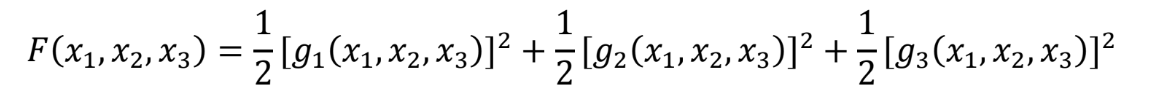


**Where**

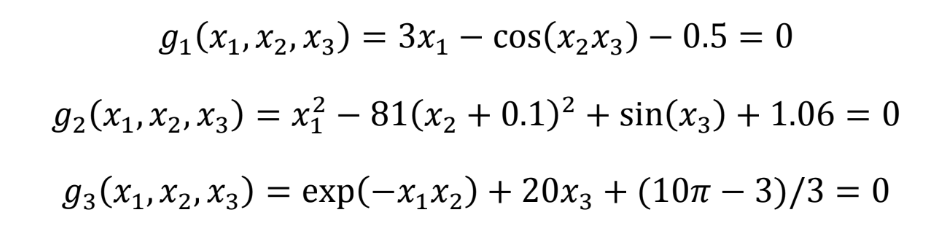


### **Import Libraries**

In [ ]:
import numpy as np
import sympy 
import matplotlib.pyplot as plt
from math import cos, sin, exp, pi, sqrt
from scipy.optimize import brent as br

In [ ]:
X = [2, 1, 1]
X = np.array(X)

# Functions

**Expression for the Fun using sympy**

In [ ]:
x1 = sympy.Symbol("x_1", positive=True)
x2 = sympy.Symbol("x_2", positive=True)
x3 = sympy.Symbol("x_3", positive=True)

G1 = sympy.Function("g_1", positive=True)(x1, x2, x3)
G2 = sympy.Function("g_2", positive=True)(x1, x2, x3)
G3 = sympy.Function("g_3", positive=True)(x1, x2, x3)

G1 = (3 * x1) - sympy.cos(x2 * x3) - 0.5
G2 = (x1 * 2) - (81 * (x2 + 0.1) ** 2) + sympy.sin(x3) + 1.06
G3 = sympy.exp(-1 * x1 * x2) + (20 * x3) + (((10 * sympy.pi) - 3) / 3)

f = sympy.Function("F", positive=True)(G1, G2, G3)
f = 0.5*(G1**2 + G2**2 + G3**2)
f


4.5*(x_1 - cos(x_2*x_3)/3 - 0.166666666666667)**2 + 3280.5*(2*x_1/81 - (x_2 + 0.1)**2 + sin(x_3)/81 + 0.0130864197530864)**2 + 0.5*(20*x_3 - 1 + 10*pi/3 + exp(-x_1*x_2))**2

In [ ]:
def g_1(X):
    return (3*X[0]) - cos(X[1] * X[2]) - 0.5

In [ ]:
def g_2(X):
    return (X[0]**2) - (81*(X[1] + 0.1)**2) + sin(X[2]) + 1.06

In [ ]:
def g_3(X):
    return exp(-X[0] * X[1]) + (20*X[2]) + ((10*pi - 3)/3)

In [ ]:
def F(X):
    return (0.5*g_1(X)**2) + (0.5*g_2(X)**2) + (0.5*g_3(X)**2)

In [ ]:
def Fun(X):
    g1 = (3*X[0]) - cos(X[1] * X[2]) - 0.5
    g2 = (X[0]**2) - (81*(X[1] + 0.1)**2) + sin(X[2]) + 1.06
    g3 = exp(-X[0] * X[1]) + (20*X[2]) + ((10*pi - 3)/3)
    g  =[g1,g2,g3]
    g = np.array(g)
    F = (0.5*g1**2) + (0.5*g2**2) + (0.5*g3**2)

    return g1,g2,g3,g,F

In [ ]:
fun1=Fun(X)
fun0=fun1[4]
fun0

4692.586285541692

In [ ]:
def Gradient_Fun(X):
    
    F_val = Fun(X)
    
    G = [(3*F_val[0]) + (2*X[0]*F_val[1]) - ((X[1]*F_val[2])*(exp(-(X[0] * X[1])))),
        (X[2]*F_val[0]*sin(X[2] * X[1])) - (162*F_val[1]*(X[1] + 0.1)) - (F_val[2]*X[0]*(exp(-(X[0] * X[1])))),
        (F_val[0]*X[1]*sin(X[2] * X[1])) + (F_val[1]*cos(X[2])) + (20*F_val[2])]
    
    G = np.array(G)
    
    GM = sqrt((G[0]**2) + (G[1]**2) + (G[2]**2))
    return G,GM,F_val[0],F_val[1],F_val[2]

Lists to store the results

In [ ]:
Grad_Output = []
Func_Output = []
It = []

# 1.conventional gradient descent technique

**The Gradient Descent Algorithm :**


1.  initialize Xn and alpha
2.  Compute The Gradient 
3.  Compute The Magnitude of the Gradient 
4.  check if |magnitude | < epsilon ? break if no go to 5
5. compute Xn+1 = Xn - alpha * gradient
6. update n
7. loop >>>




In [ ]:
def Gradient_Descent_Fun():

     
      X = [0.06,-0.26, 0.056]       #initializing variables
      X = np.array(X)
      alpha = 0.00027               #Learning Rate            
      epsilon = 0.00000001          #Epsilon value
      for i in range (0,100):
          
          ## Calculate gradient and magnitude
          Grad = Gradient_Fun(X)
          print("GM:",Grad[1])
          ##store
          Grad_Output.append(Grad[1])
          Func_Output.append(Grad[2])
          It.append(i)
    
          ## check if the GM < epsilon 
          if Grad[1] < epsilon:
              break
          else:
         
          ## calculate X_i+1 = X_i - (alpha*G)     
             X = X - (alpha * Grad[0])
             print("#It:",i+1," X1_new:",X[0]," X2_new:",X[1]," X3_new:",X[2])
                 
          


      #Visualize Results
      print("X1_f= ",X[0]," X2_f= ",X[1]," X3_f= ",X[2])
      plt.plot(It,Grad_Output,label="Gradient")
      plt.plot(It,Func_Output,label="Function")
      plt.legend()
      plt.show()

GM: 232.59349264710602
#It: 1  X1_new: 0.060272352812953574  X2_new: -0.253132610951394  X3_new: -0.0064230351257296495
GM: 207.46074039922712
#It: 2  X1_new: 0.06064943022793883  X2_new: -0.24732032388792274  X3_new: -0.0621337892827583
GM: 185.0853635286331
#It: 3  X1_new: 0.061115089738555464  X2_new: -0.24229303452608972  X3_new: -0.11185114102807694
GM: 165.14750894806303
#It: 4  X1_new: 0.06165623483512454  X2_new: -0.23787443725187785  X3_new: -0.15621819940588022
GM: 147.3735430674206
#It: 5  X1_new: 0.06226203415342054  X2_new: -0.23394353860117661  X3_new: -0.19580978076088698
GM: 131.52462298926972
#It: 6  X1_new: 0.0629234087586438  X2_new: -0.23041378081920635  X3_new: -0.23113937957006137
GM: 117.39023350094088
#It: 7  X1_new: 0.06363267441658055  X2_new: -0.2272210159814296  X3_new: -0.2626655470105795
GM: 104.7838958416151
#It: 8  X1_new: 0.06438328001048266  X2_new: -0.224316238499252  X3_new: -0.29079767144091984
GM: 93.53997406686177
#It: 9  X1_new: 0.065169609200448

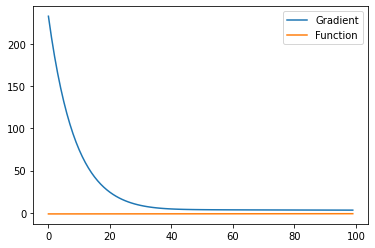

In [ ]:
Gradient_Descent_Fun()

# 2.The Newton-Raphson’s technique

**The Newton-Raphson Algorithm :**


1.  initialize Xn 
2.  Compute The Gradient and hessian matrix
3.  Compute The Magnitude of the Gradient 
4.  check if |magnitude | < epsilon ? break if no go to 5
5.  compute alpha = inverse hessian matrix
6.  compute Xn+1 = Xn - alpha * gradient
7.  update n
8.  loop >>>




**Hessian matrix**
the matrix usually arranged as fllow

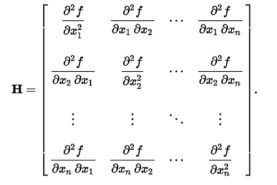



So we need to get H

> first derivatives

> second derivatives





**Derivatives by sympy**

In [ ]:
#the first derevatives
DFX0 = sympy.diff(f, x1)
DFX1 = sympy.diff(f, x2)
DFX2 = sympy.diff(f, x3)
#second derevatives
D2X0 = sympy.diff(f, x1, x1)
D2X1 = sympy.diff(f, x2, x2)
D2X2 = sympy.diff(f, x3, x3)
#partial derevatives
DX0X1 = sympy.diff(f, x1, x2)
DX0X2 = sympy.diff(f, x1, x3)
DX1X2 = sympy.diff(f, x2, x3)

Gradient = sympy.Array([dF_dx1, dF_dx2, dF_dx3]).reshape(3,1)

#Constructing the Hessian Matrix
Hessian_sympy = sympy.Array([[D2X0, DX0X1, DX1X2],
                             [DX0X1, D2X1, DX1X2],
                             [DX0X2, DX1X2, D2X2]])
Hessian_sympy

NameError: ignored

**Derivatives with hand**

In [ ]:
def Hessian_F(X,g):
    ##DIFF F(X)
    # DFX0= (3*F_val[0]) + (2*X[0]*F_val[1]) - (X[1]*F_val[2])*exp(-(X[0] * X[1]))
    # DFX1= (X[2]*F_val[0]*sin(X[2] * X[1])) - (162*F_val[1]*(X[1] + 0.1)) - (F_val[2]*X[0]*(exp(-(X[0] * X[1]))))
    # DFX2= (F_val[0]*X[1]*sin(X[2] * X[1])) + (F_val[1]*cos(X[2])) + (20*F_val[2])
    D2X0 = 9 + 2*g[1] + 4*X[0]**2 + (X[1]**2)*(exp(-X[0] * X[1]))*(g[2]*exp(-X[0] * X[1]))    
    D2X1 = (X[2]**2)*( (g[0]*cos(X[1]*X[2])) + (sin(X[1]*X[2])**2) ) - 162*g[1] + 26244*(X[1]+0.1)**2 + (X[0]**2)*(exp(-X[0] * X[1]))*(g[2]*exp(-X[0] * X[1]))
    D2X2 = (X[1]**2)*( (g[0]*cos(X[1]*X[2])) + (sin(X[1]*X[2])**2) ) - g[1]*sin(X[2]) + (cos(X[2])**2) + 400
    
    DX0X1 = 3*X[2]*sin(X[1]*X[2]) - 324*X[0]*(X[1]+0.1) + (X[0]*X[1])*(exp(-X[0] * X[1]))*(g[2]*exp(-X[0] * X[1]))
    DX1X0 = DX0X1
    
    DX1X2 = g[0]*(sin(X[1]*X[2])+(X[1]*X[2]*sin(X[1]*X[2])**2)) + cos(X[2]*(-162*(X[1]+0.1))) - 20*X[0]*exp(-X[0] * X[1])
    DX2X1 = DX1X2
    
    DX0X2 = 3*X[1]*sin(X[1]*X[2]) + 2*X[0]*cos(X[2]) - 20*X[1]*exp(-X[0] * X[1])
    DX2X0 = DX0X2
    
    H = [[D2X0,DX1X0,DX2X0],
        [DX0X1,D2X1,DX2X1],
        [DX0X2,DX1X2,D2X2]] 
    return H

Calculate Alpha

In [ ]:
def Calc_Alpha(H):
    alpha = np.linalg.inv(H)
    return alpha

Main of *Newton_Raphson_Fun*

In [ ]:
g2  = Fun(X)
g= g2[0:3]
g=np.array(g)
def Newton_Raphson_Fun(g):
 X = [0.0, 0.0, 0.0]     #initialize Xn
 X = np.array(X)
 epsilon = 0.00003       #initialize epsilon
 Fun(X)
 Gradient_Fun(X)         #Compute The Gradien
 Hessian_F(X,g)          #Compute The Hessien Matrix
 Hessian = Hessian_F(X, g)
 Calc_Alpha(Hessian)           #Calculate Alpha

 #Define Lists to store the results
 Grad_Output = []
 Func_Output = []
 It = []
 g = np.zeros(shape=(3))
 
 #loop for 100 iteration 
 for i in range (0,100):
    ## Calculate gradient vector and magnitude
    Grad = Gradient_Fun(X)
    print("GM:",Grad[1])
    
    Grad_Output.append(Grad[1])
    Func_Output.append(Grad[2])
    It.append(i)
    
    ## check if the GM < epsilon 
    if Grad[1] < epsilon:
        break
    else:
    ## calculate X_i+1 = X_i - (alpha*G) && alpha = inv(H)
        Hessian = Hessian_F(X, g)
        alpha = Calc_Alpha(Hessian)
        print("Alpha:",alpha)
        
        X = X - (np.dot(alpha, Grad[0]))
        print("#It:",i+1," X1_new:",X[0]," X2_new:",X[1]," X3_new:",X[2])
                
    

 #Visualize Results
 print("X1_f= ",X[0]," X2_f= ",X[1]," X3_f= ",X[2])
 plt.plot(It,Grad_Output,label="Gradient")
 plt.plot(It,Func_Output,label="Function")
 plt.legend()
 plt.show()

In [ ]:
def func(x):
x[0] = ['123']
x[1] = ['abc']
return id(x)
q = ['abc', '123']
print(id(q)==func(q))

IndentationError: ignored

GM: 209.77688910937187
Alpha: [[ 1.11111111e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.81043096e-03 -9.50232161e-06]
 [ 0.00000000e+00 -9.50232161e-06  2.49378928e-03]]
#It: 1  X1_new: 0.5  X2_new: 0.01742478257015106  X3_new: -0.5229599377104481
GM: 5.835992092567254
Alpha: [[1.11092629e-01 5.83595749e-03 1.27158815e-05]
 [5.83595749e-03 3.07223494e-03 7.50586381e-05]
 [1.27158815e-05 7.50586381e-05 2.49732024e-03]]
#It: 2  X1_new: 0.5000316008246346  X2_new: 0.0013299392410062276  X3_new: -0.5229354163187105
GM: 0.4129584009933129
Alpha: [[ 1.11110588e-01  6.76654660e-03 -5.28393336e-05]
 [ 6.76654660e-03  4.12701676e-03  9.56093960e-05]
 [-5.28393336e-05  9.56093960e-05  2.49797189e-03]]
#It: 3  X1_new: 0.5000576241291245  X2_new: 4.617797844573947e-05  X3_new: -0.5235529858986264
GM: 0.02002665634268044
Alpha: [[ 1.11112435e-01  6.85403173e-03 -5.87505668e-05]
 [ 6.85403173e-03  4.23373370e-03  9.70938142e-05]
 [-5.87505668e-05  9.70938142e-05  2.49801392e-03]]
#It: 

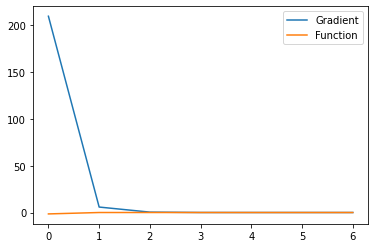

In [ ]:
 Newton_Raphson_Fun(g)

# 3.The line search gradient descent (steepest) technique

**The line search gradient descent (steepest) Algorithm :**


1.  initialize Xn and alpha
2.  Compute The Gradient 
3.  Compute The Magnitude of the Gradient 
4.  check if |magnitude | < epsilon ? break if no go to 5
5. update alpha*n+1 = alphan - gradient(alphn)/second derivatives(alphan) 
6. compute Xn+1 = Xn - alpha * gradient
7. update n
8. loop >>>




**Main of steepest_Fun**

In [ ]:
def steepest_Fun():   
 X0 = np.array([0.0, 0.0, 0.0])         #Initial Point
 epsilon = 0.0000001                       #Epsilon value


 def Gradient_F(X):    #Gradient Vector of F ---> dF = [dx1, dx2, dx3]
    G = [(3*g_1(X)) + (2*X[0]*g_2(X)) - (X[1]*g_3(X)*exp(-(X[0] * X[1]))),
         (X[2]*g_1(X)*sin(X[2] * X[1])) - (162*g_2(X)*(X[1] + 0.1)) - (g_3(X)*X[0]*exp(-(X[0] * X[1]))),
         (g_1(X)*X[1]*sin(X[2] * X[1])) + (g_2(X)*cos(X[2])) + (20*g_3(X))]
    return np.array(G)         



 def Gradient_Mag(G):
    return sqrt((G[0]**2) + (G[1]**2) + (G[2]**2))


 # Initial Value 
 Direction = np.array(Gradient_F(X0))
 GM = Gradient_Mag(Gradient_F(X0))
 X = X0
 alpha_opt = 0.0
 F_new = 0.0
 count = 0

 #Lists to store the results 
 GradMag = []
 Func_Output = []
 It = []

 while GM > epsilon:
    
    count = count + 1
    It.append(count)
    
    def phi(alpha):     
        return F(X - alpha*Gradient_F(X))
    
    alpha_opt = br(phi)
    X = X - alpha_opt*Gradient_F(X)
    
    GM = Gradient_Mag(Gradient_F(X))
    GradMag.append(GM)
    
    F_new = F(X)
    Func_Output.append(F_new)
    
    print("It:",count,"-->" ,"Alpha = ", alpha_opt, "X = ", X, "GM = ", GM, "F(X) = ", F_new)

 print('#Iterations = ', count)
 print("Alpha_opt = ",alpha_opt)
 print("Grad_Mag = ",GM)
 print("X_min = ", X)

 #Visualize Results
 plt.plot(It,GradMag,label="Gradient")
 plt.plot(It,Func_Output,label="Function")
 plt.legend()
 plt.show()   


# TEST FUNCTIONS

It: 1 --> Alpha =  0.002492047802821107 X =  [ 0.01121422  0.01009279 -0.52255628] GM =  8.699403142054635 F(X) =  1.1638014982348381
It: 2 --> Alpha =  0.027164673419855588 X =  [ 0.13097445 -0.19362536 -0.52392086] GM =  3.882673975241851 F(X) =  0.6161801909791838
It: 3 --> Alpha =  0.09357983245476499 X =  [ 0.44323752 -0.00987207 -0.55116873] GM =  10.91883749092288 F(X) =  0.16690672285767938
It: 4 --> Alpha =  0.002527860493228175 X =  [ 0.44437487 -0.00772782 -0.52367436] GM =  1.1091654119941894 F(X) =  0.01621970032489233
It: 5 --> Alpha =  0.005211675673478131 X =  [ 0.44666992 -0.0024466  -0.52418118] GM =  0.5713981481925506 F(X) =  0.012924101851621206
It: 6 --> Alpha =  0.009129733121087436 X =  [ 0.45114871 -0.00419901 -0.52216038] GM =  0.8337430056104456 F(X) =  0.011437301542306303
It: 7 --> Alpha =  0.0035478924387698555 X =  [ 0.45263966 -0.00297335 -0.52440198] GM =  0.5163529188843703 F(X) =  0.010202977948276359
It: 8 --> Alpha =  0.007410878454081552 X =  [ 0.4

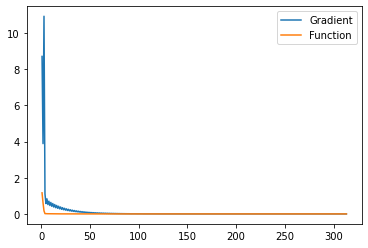

In [ ]:
steepest_Fun()